In [67]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from src.path_loss import PathLossInHIndoorOffice, PathLossInHShoppingMalls

from src.network_sim import NetworkSimulator


%reload_ext autoreload
%autoreload 2
%aimport src

In [68]:
frequency_Hz= 50 * 1e9 # Hz
distance_m = 50
sample_size = 10

In [69]:
pd.DataFrame({
    'PathLossInHIndoorOffice':[PathLossInHIndoorOffice().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
    'PathLossInHShoppingMalls': [PathLossInHShoppingMalls().in_dBm(frequency_Hz=frequency_Hz, distance_m=distance_m) for i in range(sample_size)],
})

,PathLossInHIndoorOffice,PathLossInHShoppingMalls
0,-133.897807,-103.739513
1,-131.871112,-107.080335
2,-144.595920,-113.625351
3,-128.402439,-100.170267
4,-137.993922,-94.908223
5,-119.372512,-97.146992
6,-123.062663,-111.377403
7,-132.201249,-98.279399
8,-134.445890,-105.931246
9,-130.975092,-102.910524


In [92]:
simulator = NetworkSimulator(Tx_radius=100, Rx_radius=25, num_Tx_known=3, num_Rx_per_Tx_known=5, num_Tx_unknown=2, num_Rx_per_Tx_unknown=3)

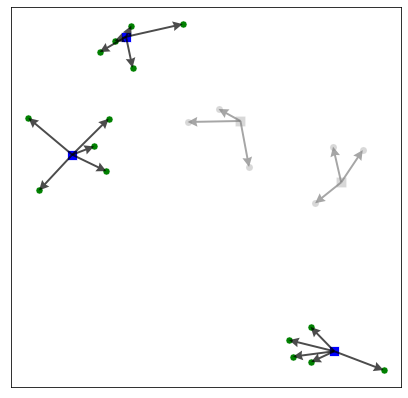

In [93]:
simulator.plot_network()

In [94]:
pd.DataFrame(simulator.gain_mat_dBm)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-94.283906,-91.693349,-105.646243,-89.102806,-90.102062,-134.872594,-126.837485,-120.244612,-142.661671,-129.279244,...,-147.508217,-132.096159,-131.262752,-137.763430,-116.387003,-120.227998,-124.148205,-124.501970,-117.920530,-120.645177
1,-121.265692,-119.530344,-133.669146,-127.507096,-131.781458,-98.774043,-85.478836,-89.533625,-107.822278,-91.315305,...,-113.765722,-110.571765,-106.042665,-110.524637,-121.386889,-96.762896,-101.300297,-104.866059,-120.928847,-115.552121
2,-143.637733,-147.170462,-134.173465,-133.052833,-138.915862,-100.606844,-99.447867,-107.641246,-115.035538,-111.756073,...,-86.420371,-103.362503,-95.295060,-91.598819,-104.986662,-107.472174,-101.282563,-114.351312,-115.948239,-126.018467
3,-113.853672,-125.553010,-122.070579,-120.011005,-120.878620,-110.423337,-103.491016,-105.249173,-105.528550,-107.056377,...,-117.781197,-106.884038,-109.312248,-116.948876,-97.454316,-91.973376,-88.156316,-117.012863,-94.841632,-121.314650
4,-115.686536,-108.792723,-121.033410,-118.108573,-114.943166,-119.625033,-117.797495,-122.533106,-120.563239,-124.007435,...,-122.993862,-116.911895,-120.544193,-121.066735,-105.736706,-111.442953,-115.468553,-96.818309,-88.319312,-92.798758


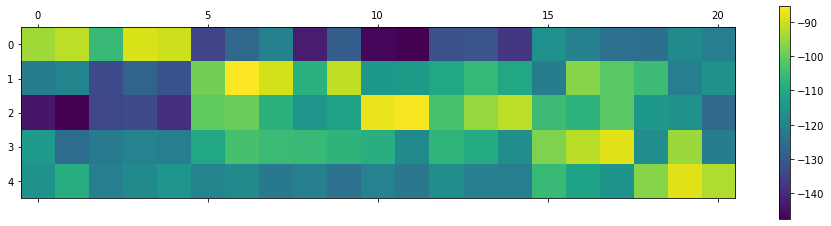

In [104]:
simulator.plot_gain_mat()

In [105]:
simulator.weighted_sum_rate_Gbps(Tx_powers=[500,350,500,600,255], Rx_weights=np.ones(len(simulator.x_Rx)))

147.957185083355

In [106]:
pd.DataFrame(simulator.get_gain_mat(unit='dBm', part='unknown'))

,0,1,2,3,4,5
0,-97.454316,-91.973376,-88.156316,-117.012863,-94.841632,-121.314650
1,-105.736706,-111.442953,-115.468553,-96.818309,-88.319312,-92.798758
